<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_progetto_multiclassSVM_reti_neurali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificatore: SVM

Features: estratte con resnet 50 (non normalizzate)

In [1]:
# scarico da dropbox le features precedentemente estratte con resnet 50 (non normalizzate)

!wget https://www.dropbox.com/s/l1ybi3k5zmusf9m/features_resnet.zip?dl=0
!unzip features_resnet.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-11 23:17:09--  https://www.dropbox.com/s/l1ybi3k5zmusf9m/features_resnet.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l1ybi3k5zmusf9m/features_resnet.zip [following]
--2022-05-11 23:17:09--  https://www.dropbox.com/s/raw/l1ybi3k5zmusf9m/features_resnet.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucadadf0e4ca5cadbc72ea21dc56.dl.dropboxusercontent.com/cd/0/inline/BlFML8KNzUUgUBGD8-AUxdaNdxDtArCCDOO88iZlw1MvrZtfpIoFrO40tbt3Jy7Q8MxVqGmABAMBbcAIQTvN1E-kYnIDIUqfmit8DpuF6jCKdi4ya0naHK1Kfh19Q3eKS-7hZtawpD4a9a5mxiuKwwOze6ywravCT43iYYh4LdNMZA/file# [following]
--2022-05-11 23:17:09--  https://ucadadf0e4ca5cadbc72ea21dc56.dl.dropboxusercontent.com/cd/0/inline/BlFML8KNzUUgUBGD8-AUxdaNdxDtArCCDOO88iZlw1

In [6]:
# Versione one-vs-rest del classificatore SVM per distinguere le classi del dataset FER_modified
# Vengono usate le features trovate tramite resnet 50 da immagini nwhc

import numpy as np

# 1. Carico in memoria il dataset
x_train = np.load('features_resnet/features_train_resnet.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test = np.load('features_resnet/features_test_resnet.npy')
y_test = np.load('array_labels/array_test_labels.npy')

In [7]:
print(x_train[2])
print(x_test[2])
print(y_train)
print(y_test)

[0.         0.80034    1.7370706  ... 0.23215124 0.07477172 0.02923287]
[0.09847405 1.2099552  0.1256875  ... 0.84824854 0.41000524 0.07799792]
[0 0 0 ... 6 6 6]
[0 0 0 ... 6 6 6]


31805 2048


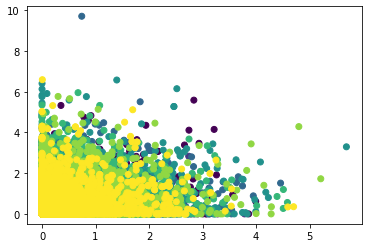

In [8]:
# Analizzo i dati

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)

# Capisco come sono i dati: scatter plot con le prime 2 features
from matplotlib import pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()


In [9]:
from sklearn.svm import SVC

# Inizializzo i parametri
kernel = 'poly'
degree = 4
#gamma = 'scale'
probability = True
# class_weight = dict or ‘balanced’, default=None
decision_function_shape = 'ovr'

max_iteration = 1000

# Inizializzo un modello di classificazione SVM per ognuna delle 7 classi
models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True)]

In [10]:
# Addestro i modelli
for i in range(7):
  models[i].fit(x_train, y_train==i)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1

In [11]:
# Classifico i dati del testing set

predicted_scores = []
for i in range(7):
  predicted_scores.append(models[i].predict_proba(x_test)[:,1])

predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)


In [16]:
# matrice di confusione

cmc = np.zeros((7,7))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0

In [13]:
# calcolo accuratezza, precision e recall media rispetto alle 7 classi

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision = []
recall = []
for i in range(7):
  precision.append(cmc[i,i]/ np.sum(cmc[:,i]))
  recall.append(cmc[i,i]/ np.sum(cmc[i,:]))

precision = np.asarray(precision)
recall  = np.asarray(recall)

print(np.shape(precision))
print(np.shape(recall))

precision_m = np.mean(precision)
recall_m = np.mean(recall)

print(np.shape(precision_m))
print(np.shape(recall_m))
print(precision_m)
print(recall_m)

print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precisione media del classificatore: ' + "{0:.2f}".format(precision_m))
print('Recall media del classificatore: ' + "{0:.2f}".format(recall_m))

(7,)
(7,)
()
()
nan
0.14285714285714285
Accuratezza del classificatore: 24.71%
Precisione media del classificatore: nan
Recall media del classificatore: 0.14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


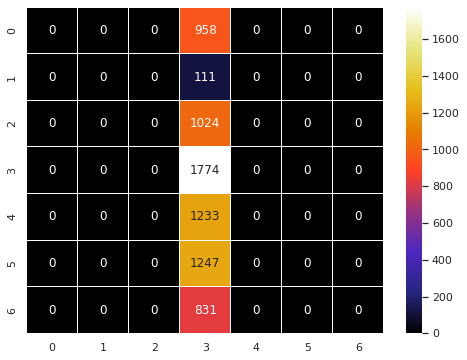

In [14]:
# stampo la matrice di confusione

import seaborn as sns; 


plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc, annot=True,fmt=".0f", linewidths=.1, cmap="CMRmap")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")


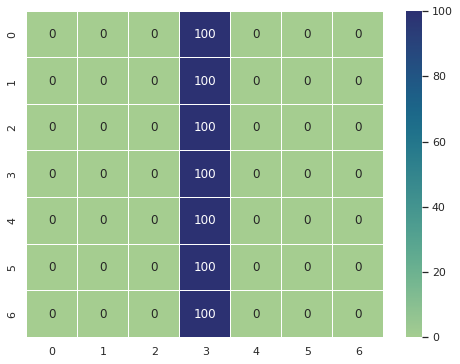

In [15]:
# ATTENZIONE, con questo codice vengono cambiati i valori della matrice cmc
# viene fatto solo per plottare con le percentuali
# poi riaggiornare la matrice di confusione

cmc2 = cmc

for i in range(7):
  total = 0
  for j in range(7):
    total += cmc[i,j]
  for j in range(7):
    cmc2[i,j] = cmc[i,j]*100/total
  
plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc2, annot=True,vmin=0.0, vmax=100.0,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")